**NLTK** is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.

In [1]:
!sudo pip3 install -U nltk numpy jieba

The directory '/home/zhenglai/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/zhenglai/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
Requirement already up-to-date: nltk in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: numpy in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: jieba in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: six in /usr/local/lib/python3.5/dist-packages (from nltk)
You are using pip version 8.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [59]:
import nltk
import numpy as np
nltk.__version__, np.__version__

('3.2.5', '1.14.0')

In [60]:
import types

for key, obj in nltk.__dict__.items():
    if type(obj) is types.ModuleType: 
        print(key)

numpy
ibm1
stanford
crf
texttiling
inspect
wordnet
stanford_segmenter
collocations
ibm4
metrics
textcat
corenlp
chunk
draw
discourse
rte_classify
decorators
lancaster
hmm
subprocess
ibm2
featurechart
agreement
help
stack_decoder
porter
bllip
locale
senna
api
earleychart
ibm3
dependencygraph
chart
mace
spearman
sexpr
data
malt
parse
os
classify
ribes_score
stem
scores
wsd
boxer
bisect
regexp
pydoc
relextract
viterbi
transitionparser
aline
paice
util
tkinter
segmentation
shiftreduce
distance
downloader
brill_trainer
sys
punkt
logic
ibm5
tadm
linearlogic
misc
simple
mapping
nonprojectivedependencyparser
translate
naivebayes
mwe
maxent
snowball
perceptron
pchart
positivenaivebayes
treetransforms
tbl
repp
brill
re
collections
evaluate
confusionmatrix
ibm_model
internals
probability
textwrap
prover9
scikitlearn
tag
tnt
jsontags
association
treebank
sequential
inference
featstruct
lazyimport
cluster
weka
decisiontree
bleu_score
types
casual
megam
grammar
tokenize
ccg
sem
rslp
recursivedescent

In [14]:
nltk.data.path.append('/media/zhenglai/data/data/nltk')

In [64]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [65]:
len(brown.sents()), len(brown.words())

(57340, 1161192)

In [66]:
brown.words()[100:110]

['Allen', 'Jr.', '.', '``', 'Only', 'a', 'relative', 'handful', 'of', 'such']

#### Tokenize

In [67]:
sent = """A "Hello, World!" program is a computer program that outputs or displays "Hello, World!" to a user."""
tokens = nltk.word_tokenize(sent)
tokens

['A',
 '``',
 'Hello',
 ',',
 'World',
 '!',
 "''",
 'program',
 'is',
 'a',
 'computer',
 'program',
 'that',
 'outputs',
 'or',
 'displays',
 '``',
 'Hello',
 ',',
 'World',
 '!',
 "''",
 'to',
 'a',
 'user',
 '.']

### Chinese Tokenize

In [3]:
import jieba
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode:", "/ ".join(seg_list)) # 全模式
seg_list = jieba.cut("我来到北京清华大大学", cut_all=False)
print("Default Mode:", "/ ".join(seg_list)) # 精确模式
seg_list = jieba.cut("他来到了网易杭研大大厦") # 默认是精确模式
print("/ ".join(seg_list))
seg_list = jieba.cut_for_search("小明硕士士毕业于中国科学院计算所,后在日本京都大学深造")
# 搜索引擎模式
print("/ ".join(seg_list))

Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 我/ 来到/ 北京/ 清华/ 大/ 大学
他/ 来到/ 了/ 网易/ 杭研大/ 大厦
小明/ 硕士/ 士/ 毕业/ 于/ 中国/ 科学/ 学院/ 科学院/ 中国科学院/ 计算/ 计算所/ ,/ 后/ 在/ 日本/ 京都/ 大学/ 日本京都大学/ 深造


In [4]:
" /".join(jieba.cut('今天天气真不错', cut_all=False))

'今天天气 /真不错'

In [70]:
" /".join(nltk.word_tokenize('what a nice weather today'))

'what /a /nice /weather /today'

In [71]:
from nltk.tokenize import word_tokenize
tweet = 'RT @somebody: love you baby! :D http://ah.love #168cm'
print(word_tokenize(tweet))

['RT', '@', 'somebody', ':', 'love', 'you', 'baby', '!', ':', 'D', 'http', ':', '//ah.love', '#', '168cm']


In [80]:
import re
emoticons_str = r"""
(?:
[:=;] # 眼睛
[oO\-]? # 鼻鼻子子
[D\)\]\(\]/\\OpP] # 嘴
)"""
regex_str = [
emoticons_str,
r'<[^>]+>', # HTML tags
r'(?:@[\w_]+)', # @某人人
r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # 话题标签
r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',
# URLs
r'(?:(?:\d+,?)+(?:\.?\d+)?)', # 数字
r"(?:[a-z][a-z'\-_]+[a-z])", # 含有 - 和 ‘ 的单词
r'(?:[\w_]+)', # 其他
r'(?:\S)' # 其他
]
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

def tokenize(s):
    return tokens_re.findall(s)
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.ssearch(token) else token.lower() for token in
        tokens]
    return tokens
tweet = 'RT @somebody: love you baby! :D http://ah.love #168cm'
print(preprocess(tweet))

['RT', '@somebody', ':', 'love', 'you', 'baby', '!', ':D', 'http://ah.love', '#168cm']


#### 纷繁复杂的词形
- inflection变化: walk => walking => walked: 不影响词性
- derivation 引申: nation (noun) => national (adjective) => nationalize (verb):影响词性

#### 词形归一化
- Stemming 词干提取:一般来说,就是把不影响词性的inflection的小尾巴砍掉
    - 基于规则
    - walking 砍ing = walk
    - walked 砍ed = walk
- Lemmatization 词形归一:把各种类型的词的变形,都归为一个形式
    - 基于字典
    - went 归一 = go
      - Went n. 英文名:温特
    - are 归一 = be


>refs: http://blog.csdn.net/march_on/article/details/8935462

In [82]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
for w in ['wolves', 'maximum', 'presumably', 'went', 'wenting', 'walking', 'walked', 'abaci']:
    print('{}  ->  {}'.format(w.ljust(10), porter_stemmer.stem(w)))

wolves      ->  wolv
maximum     ->  maximum
presumably  ->  presum
went        ->  went
wenting     ->  went
walking     ->  walk
walked      ->  walk
abaci       ->  abaci


In [6]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
for w in ['wolves', 'maximum', 'presumably', 'went', 'wenting', 'walking', 'walked', 'abaci']:
    print('{}  ->  {}'.format(w.ljust(10), lemmatizer.lemmatize(w)))

[nltk_data] Error loading wordnet: <urlopen error [Errno 110]
[nltk_data]     Connection timed out>


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  Searched in:
    - '/home/zhenglai/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/usr/nltk_data'
    - '/usr/lib/nltk_data'
**********************************************************************


### POS

- Part-of-Speach

In [106]:
for n in ['JJ', 'IN', 'NNP', 'NN', 'V', 'NNS', 'WDT']:
    nltk.help.upenn_tagset(n)

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel bewar

In [86]:
# default to `NN`
lemmatizer.lemmatize('are'), lemmatizer.lemmatize('is')

('are', 'is')

In [87]:
# add POS tag
lemmatizer.lemmatize('are', pos='v'), lemmatizer.lemmatize('is', pos='v')

('be', 'be')

In [88]:
text = nltk.word_tokenize('what does the fox say')
text, nltk.pos_tag(text)

(['what', 'does', 'the', 'fox', 'say'],
 [('what', 'WDT'),
  ('does', 'VBZ'),
  ('the', 'DT'),
  ('fox', 'NNS'),
  ('say', 'VBP')])

### Stopwords
- 一千个HE有一千种指代
- 一千个THE有一千种指事
- 对于注重理解文本『意思』的应用场景来说, 歧义太多
- http://www.ranks.nl/stopwords

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zhenglai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords

word_list = nltk.word_tokenize('I am ok, you are fine, and he is good now')
filtered_words = [word for word in word_list if word not in stopwords.words('english')]
word_list, filtered_words

(['I',
  'am',
  'ok',
  ',',
  'you',
  'are',
  'fine',
  ',',
  'and',
  'he',
  'is',
  'good',
  'now'],
 ['I', 'ok', ',', 'fine', ',', 'good'])

In [20]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Text Preprocessing Pipeline

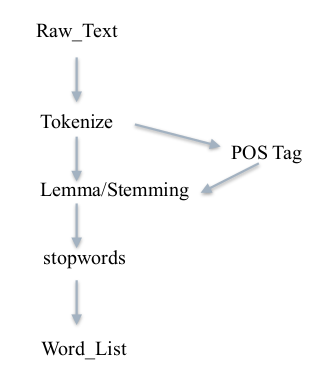

In [93]:
from IPython.display import Image, display; 
Image(filename='../files/00_word2vec_00_text_preprocessing.png')

### 情感分析

- 最简单的 sentiment dictionary
  - like 1
  - good 2
  - bad -2
  - terrible -3
  - 类似于关键词打分机制
  - [AFINN-111](http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010)
  - 太Naive
  - 新词怎么办?
  - 特殊词汇怎么办

In [94]:
sentiment_dictionary = {}
for line in open('/media/zhenglai/data/data/AFINN/AFINN-111.txt'):
    word, score = line.split('\t')
    sentiment_dictionary[word] = int(score)
# 把这个打分表记录在一一个Dict上以后
# 跑一一遍整个句句子子,把对应的值相加
total_score = sum(sentiment_dictionary.get(word, 0) for word in word_list)
# 有值就是Dict中的值,没有就是0
# 于是你就得到了了一一个 sentiment score
total_score

5

In [95]:
list(sentiment_dictionary.items())[10:20]

[('buoyant', 2),
 ('terror', -3),
 ('ominous', 3),
 ('bribe', -3),
 ('disastrous', -3),
 ('please', 1),
 ('affronted', -1),
 ('strong', 2),
 ('slut', -5),
 ('pathetic', -2)]

### 配上ML的情感分析

In [21]:
from nltk.classify import NaiveBayesClassifier
# 随手手造点训练集
s1 = 'this is a good book'
s2 = 'this is a awesome book'
s3 = 'this is a bad book'
s4 = 'this is a terrible book'
def preprocess(s):
    return {word: True for word in s.lower().split()}

# 把训练集给做成标准形式
training_data = [
    [preprocess(s1), 'pos'],
    [preprocess(s2), 'pos'],
    [preprocess(s3), 'neg'],
    [preprocess(s4), 'neg']]
# 喂给model吃
model = NaiveBayesClassifier.train(training_data)
# 打出结果
print(model.classify(preprocess('this is not a good book')))
print(model.classify(preprocess('this is a good person')))
print(model.classify(preprocess('this is a bad person')))

pos
pos
neg


- TF: Term Frequency, 衡量一个term在文档中出现得有多频繁。
TF(t) = (t出现在文档中的次数) / (文档中的term总数).
- IDF: Inverse Document Frequency, 衡量一个term有多重要。
有些词出现的很多,但是明显不是很有卵用。比如’is',’the‘,’and‘之类
的。为了平衡,我们把罕见的词的重要性(weight)搞高,
把常见词的重要性搞低。
  - IDF(t) = log_e(文档总数 / 含有t的文档总数).
- TF-IDF = TF * IDF

- 一个文档有100个单词,其中单词baby出现了3次。那么,TF(baby) = (3/100) = 0.03.
- 现在我们如果有10M的文档, baby出现在其中的1000个文档中。
那么,IDF(baby) = log(10,000,000 / 1,000) = 4
- 所以, TF-IDF(baby) = TF(baby) x IDF(baby) = 0.03 * 4 = 0.12

## NLP

- 传统: 基于规则
- 现代:基于统计机器学习
  - HMM, CRF, SVM, LDA, CNN...
  - “规则”隐含在模型参数里
  
## Word Embedding
- Word Embeddings are the texts converted into numbers
- 词编码需要保证词的相似性
  - nearest words to frog? toad, litoria, rana, lizard...
- 简单 词/短语 翻译
  - 向量空间分布的相似性
- 向量空间子结构
  - $$V_{King} - V_{Queen} + V_{Women} = V_{Man}$$
  - $$V_{Paris} - V_{France} + V_{German} = V_{Berlin}$$
- 词向量表示作为机器学习、特别是深度学习的输入和表示空间
- 离散表示: One-hot表示
  - 词典包含10个单词,每个单词有唯一索引
  - 在词典中的顺序和在句子中的顺序没有关联

### Different types of Word Embeddings

- Frequency based Embedding
  - Count Vector
  - TF-IDF Vector
  - Co-Occurrence Vector
- Prediction based Embedding
  - words that appear in the same contexts share semantic meaning
    - CBOW
    - Skip-Gram
  - good properties
    - word embeddings or word Vectors are numerical representations of contextual similarities between words,
    - Finding the degree of similarity between two words: `model.similarity('woman','man')` => 0.737
    - Finding odd one out: `model.doesnt_match('breakfast cereal dinner lunch';.split())` => cereal
    - Amazing things like woman+king-man =queen: `model.most_similar(positive=['woman','king'],negative=['man'],topn=1)` => queen: 0.508
    - Probability of a text under the model: `model.score(['The fox jumped over the lazy dog'.split()])` => 0.21
    - It can be used to perform Machine Translation
    ![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/05003807/ml.png)

*t-SNE representation of word vectors in 2 dimension and you can see that two contexts of apple have been captured*
![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/05003425/graph1.jpg)

![](https://upload-images.jianshu.io/upload_images/712028-2b38e09f94542c64.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/700)

#### CBOW (Continuous Bag of words)

- predict the probability of a word given a context. 
  - A context may be a single word or a group of words
  - CBOW在许多分布式信息上进行平滑（将整个上下文作为一种情况），大多数情况下这个模型在小一点的数据集上更有效

### Skip-Gram Model
- skip-gram将每一对context-target词作为一种新的情况，在大一点的数据集上的会有更好效果
- Before skip-gram there was a bi-gram model which uses the most adjacent word to train the model. 
- But in this case the word can be any word inside the window. So you can use any of the words inside the window skipping the most adjacent word. Hence skip-gram.
- unsupervised feature learning
  - where you train an auto-encoder to compress an input vector in the hidden layer, and decompress it back to the original in the output layer. After training it, you strip off the output layer (the decompression step) and just use the hidden layer
  - it's a trick for learning good image features without having labeled training data.
- window size
  - A typical window size might be 5, meaning 5 words behind and 5 words ahead (10 in total).
- “The quick brown fox jumps over the lazy dog.” with windows size of 2
![](http://mccormickml.com/assets/word2vec/training_data.png)
- The network is going to learn the statistics from the number of times each pairing shows up

#### Model details

- we first build a vocabulary of words from our training documents, Let’s say we have a vocabulary of 10,000 unique words.
- Input as a one-hot vector. This vector will have 10,000 components (one for every word in our vocabulary) 
- The output of the network is a single vector (also with 10,000 components) containing, for every word in our vocabulary, the probability that a randomly selected nearby word is that vocabulary word.
- There is no activation function on the hidden layer neurons, but the output neurons use softmax.
![](http://mccormickml.com/assets/word2vec/skip_gram_net_arch.png)

##### Hidden Layer

-  A weight matrix with 10,000 rows (one for every word in our vocabulary) and 300 columns (one for every hidden neuron).
- 300 features is what Google used in their published model trained on the Google news dataset - The number of features is a "hyper parameter".
[![](http://mccormickml.com/assets/word2vec/word2vec_weight_matrix_lookup_table.png)](http://mccormickml.com/assets/word2vec/word2vec_weight_matrix_lookup_table.png)
- what if multiply a 1 x 10,000 one-hot vector by a 10,000 x 300 matrix, it's just operating as a lookup table.
![](http://mccormickml.com/assets/word2vec/matrix_mult_w_one_hot.png)

##### Output layer
- The output layer is a softmax regression classifier
- neural network does not know anything about the offset of the output word relative to the input word. It does not learn a different set of probabilities for the word before the input versus the word after
![](http://mccormickml.com/assets/word2vec/output_weights_function.png)

##### Intuition
- If two different words have very similar “contexts” (that is, what words are likely to appear around them), then our model needs to output very similar results for these two words. - And one way for the network to output similar context predictions for these two words is **if the word vectors are similar**. 
- If two words have similar contexts, then our network is motivated to learn similar word vectors for these two words!
- for two words to have similar contexts
  - synonyms like “intelligent” and “smart”
  - related, like “engine” and “transmission”
  - easier stemming, like the network will likely learn similar word vectors for the words “ant” and “ants” 
- skip-gram neural network contains a huge number of weights
  - with 300 features and a vocab of 10,000 words, that’s 3M weights in the hidden layer and output layer each
  - Training this on a large dataset would be prohibitive
  

#### Train
- Need huge amount of training data in order to tune that many weights and avoid over-fitting
- Slow

#### Solutions
- Treating common word pairs or phrases as single “words” in their model.
- Subsampling frequent words to decrease the number of training examples.
- Modifying the optimization objective with a technique they called “Negative Sampling”, which causes each training sample to update only a small percentage of the model’s weights.


#### NCE
- 对于每一个样本，除了他自己的label，同时采样出N个其他的label，从而我们只需要计算样本在这N+1个label上的概率，而不用计算样本在所有label上的概率.
![](https://upload-images.jianshu.io/upload_images/5843610-1e9192a53aa78286.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/586)
- softmax的分母要计算整个词表的得分

##### Google pre-trained Word2Vec model
- It’s 1.5GB! 
- It includes word vectors for a vocabulary of 3 million words and phrases that they trained on roughly 100 billion words from a Google News dataset. 
- The vector length is 300 features.

###### Interesting aspects

- Does it include stop words?
Answer: Some stop words like "a", "and", "of" are excluded, but others like "the", "also", "should" are included.
- Does it include misspellings of words?
Answer: Yes. For instance, it includes both "mispelled" and "misspelled"--the latter is the correct one.
- Does it include commonly paired words?
Answer: Yes. For instance, it includes "Soviet_Union" and "New_York".
- Does it include numbers?
Answer: Not directly; e.g., you won't find "100". But it does include entries like "###MHz_DDR2_SDRAM" where I'm assuming the '#' are intended to match any digit.

In [23]:
import gensim
import logging

# Logging code taken from http://rare-technologies.com/word2vec-tutorial/
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('/media/zhenglai/data/model/GoogleNews-vectors-negative300.bin', binary=True)  
# memory cost: 3 million words * 300 features * 4bytes/feature = ~3.35GB

2018-01-26 15:35:23,358 : INFO : loading projection weights from /media/zhenglai/data/model/GoogleNews-vectors-negative300.bin
2018-01-26 15:36:01,638 : INFO : loaded (3000000, 300) matrix from /media/zhenglai/data/model/GoogleNews-vectors-negative300.bin


In [14]:
('a' in model.vocab, 'and' in model.vocab, 'the' in model.vocab)

(False, False, True)

In [16]:
"hello" in model.vocab

True

In [21]:
"New_York" in model.vocab

True

In [56]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192315101624),
 ('monarch', 0.6189672946929932),
 ('princess', 0.5902429819107056),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377322435379028),
 ('kings', 0.5236843824386597),
 ('Queen_Consort', 0.5235944986343384),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098592638969421),
 ('monarchy', 0.5087411999702454)]

In [36]:
model.most_similar(positive=['good'])

[('great', 0.7291509509086609),
 ('bad', 0.7190051078796387),
 ('terrific', 0.6889116168022156),
 ('decent', 0.6837347149848938),
 ('nice', 0.683609127998352),
 ('excellent', 0.6442930102348328),
 ('fantastic', 0.6407779455184937),
 ('better', 0.6120728850364685),
 ('solid', 0.5806034803390503),
 ('lousy', 0.5764201879501343)]

In [107]:
model.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])

AttributeError: 'NaiveBayesClassifier' object has no attribute 'most_similar_cosmul'

In [58]:
model.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])

[('queen', 0.9314123392105103),
 ('monarch', 0.858533501625061),
 ('princess', 0.8476566076278687),
 ('Queen_Consort', 0.8150269389152527),
 ('queens', 0.8099815845489502),
 ('crown_prince', 0.808997631072998),
 ('royal_palace', 0.8027306795120239),
 ('monarchy', 0.801961362361908),
 ('prince', 0.8009798526763916),
 ('empress', 0.7958388328552246)]

In [49]:
model.doesnt_match("breakfast cereal dinner lunch".split())

2018-01-25 16:32:57,975 : INFO : precomputing L2-norms of word weight vectors


'cereal'

In [53]:
model.doesnt_match("apple google microsoft facebook".split())

'apple'

In [54]:
model.doesnt_match("apple google microsoft facebook　orange".split())

'orange'

In [27]:
model.similarity('woman', 'man')

0.7664012230995353

In [38]:
model.similarity('boy', 'girl')

0.8543271914204855

In [38]:
def get_similarity(w, wl):
    return [model.similarity(w, x) for x in wl] 

In [40]:
get_similarity('apple', ['mac', 'google', 'iphone', 'ipad'])

[0.24305128010006555,
 0.2277479958585296,
 0.31990406601708554,
 0.35862676003165994]

In [42]:
get_similarity('orange', ['mac', 'google', 'iphone', 'ipad'])

[0.12329282143219919,
 0.0545070610444016,
 0.15719912945159908,
 0.1411240004159244]

In [44]:
get_similarity('deep', ['mac', 'google', 'iphone', 'ipad'])

[-0.029601076652710112,
 -0.002686200359970803,
 -0.0627914307547104,
 -0.1003647502897477]

In [39]:
get_similarity('test', ['mac', 'google', 'iphone', 'ipad'])

[0.028935402538443355,
 0.06100333246535389,
 0.01974472197122787,
 0.02710275658467912]

In [5]:
# -*- coding: utf-8 -*-
import math
import os

import numpy as np
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector

batch_size = 64
embedding_dimension = 5
negative_samples = 8
LOG_DIR = "logs/word2vec_test"

digit_to_word_map = {1: "one", 2: "two", 3: "three", 4: "four", 5: "five",
                     6: "six", 7: "seven", 8: "eight", 9: "nine"}
sentences = []

# Create two kinds of sentences - sequences of odd and even digits.
for i in range(10000):
    rand_odd_ints = np.random.choice(range(1, 10, 2), 3)
    sentences.append(" ".join([digit_to_word_map[r] for r in rand_odd_ints]))
    rand_even_ints = np.random.choice(range(2, 10, 2), 3)
    sentences.append(" ".join([digit_to_word_map[r] for r in rand_even_ints]))

# Map words to indices
word2index_map = {}
index = 0
for sent in sentences:
    for word in sent.lower().split():
        if word not in word2index_map:
            word2index_map[word] = index
            index += 1
index2word_map = {index: word for word, index in word2index_map.items()}

vocabulary_size = len(index2word_map)

# Generate skip-gram pairs
skip_gram_pairs = []
for sent in sentences:
    tokenized_sent = sent.lower().split()
    for i in range(1, len(tokenized_sent) - 1):
        # [[before, after], current]
        word_context_pair = [[word2index_map[tokenized_sent[i - 1]],
                              word2index_map[tokenized_sent[i + 1]]],
                             word2index_map[tokenized_sent[i]]]
        skip_gram_pairs.append([word_context_pair[1],
                                word_context_pair[0][0]])
        skip_gram_pairs.append([word_context_pair[1],
                                word_context_pair[0][1]])


def get_skipgram_batch(batch_size):
    instance_indices = list(range(len(skip_gram_pairs)))
    np.random.shuffle(instance_indices)
    batch = instance_indices[:batch_size]
    x = [skip_gram_pairs[i][0] for i in batch]
    y = [[skip_gram_pairs[i][1]] for i in batch]
    return x, y


# batch example
x_batch, y_batch = get_skipgram_batch(8)
print(x_batch)
print(y_batch)
print([index2word_map[word] for word in x_batch])
print([index2word_map[word[0]] for word in y_batch])

# Input data, labels
train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

# Embedding lookup table currently only implemented in CPU
with tf.name_scope("embeddings"):
    embeddings = tf.Variable(
        tf.random_uniform([vocabulary_size, embedding_dimension],
                          -1.0, 1.0), name='embedding')
    # a lookup table
    embed = tf.nn.embedding_lookup(embeddings, train_inputs)

# Create variables for the NCE loss
nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_dimension],
                        stddev=1.0 / math.sqrt(embedding_dimension)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

loss = tf.reduce_mean(
    tf.nn.nce_loss(weights=nce_weights,
                   biases=nce_biases,
                   inputs=embed,
                   labels=train_labels,
                   num_sampled=negative_samples,
                   num_classes=vocabulary_size))
tf.summary.scalar("NCE_loss", loss)

# learning rate decay
global_step = tf.Variable(0, trainable=False)
learningRate = tf.train.exponential_decay(learning_rate=0.1,
                                          global_step=global_step,
                                          decay_steps=1000,
                                          decay_rate=0.95,
                                          staircase=True)
train_step = tf.train.GradientDescentOptimizer(learningRate).minimize(loss)
merged = tf.summary.merge_all()

with tf.Session() as sess:
    train_writer = tf.summary.FileWriter(LOG_DIR, graph=tf.get_default_graph())
    saver = tf.train.Saver()

    with open(os.path.join(LOG_DIR, 'metadata.tsv'), "w") as metadata:
        metadata.write('Name\tClass\n')
        for k, v in index2word_map.items():
            metadata.write('%s\t%d\n' % (v, k))

    config = projector.ProjectorConfig()
    embedding = config.embeddings.add()
    embedding.tensor_name = embeddings.name
    # Link this tensor to its metadata file (e.g. labels).
    embedding.metadata_path = os.path.join(LOG_DIR, 'metadata.tsv')
    projector.visualize_embeddings(train_writer, config)

    tf.global_variables_initializer().run()

    for step in range(1000):
        x_batch, y_batch = get_skipgram_batch(batch_size)
        summary, _ = sess.run([merged, train_step],
                              feed_dict={train_inputs: x_batch,
                                         train_labels: y_batch})
        train_writer.add_summary(summary, step)

        if step % 100 == 0:
            saver.save(sess, os.path.join(LOG_DIR, "w2v_model.ckpt"), step)
            loss_value = sess.run(loss,
                                  feed_dict={train_inputs: x_batch,
                                             train_labels: y_batch})
            print("Loss at %d: %.5f" % (step, loss_value))

    # Normalize embeddings before using
    norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
    normalized_embeddings = embeddings / norm
    normalized_embeddings_matrix = sess.run(normalized_embeddings)

def test_word(word_str):
    ref_word = normalized_embeddings_matrix[word2index_map[word_str]]

    cosine_dists = np.dot(normalized_embeddings_matrix, ref_word)
    ff = np.argsort(cosine_dists)[::-1][1:10]
    print("testing cosine dists to {}".format(word_str))
    for f in ff:
        print(index2word_map[f], '->', cosine_dists[f])
    print()

test_word('one')
test_word('two')
test_word('three')
test_word('four')
test_word('five')

[7, 3, 4, 7, 3, 7, 4, 2]
[[7], [6], [1], [3], [6], [7], [0], [3]]
['six', 'four', 'one', 'six', 'four', 'six', 'one', 'eight']
['six', 'two', 'seven', 'four', 'two', 'six', 'five', 'four']
Loss at 0: 7.35702
Loss at 100: 3.44722
Loss at 200: 2.91450
Loss at 300: 2.71819
Loss at 400: 2.60483
Loss at 500: 2.59928
Loss at 600: 2.54176
Loss at 700: 2.55187
Loss at 800: 2.52209
Loss at 900: 2.48728
testing cosine dists to one
seven -> 0.8460716
three -> 0.8399113
nine -> 0.73751897
five -> 0.64920115
two -> -0.20698225
eight -> -0.21769652
six -> -0.24484032
four -> -0.26775

testing cosine dists to two
six -> 0.8733612
four -> 0.8454992
eight -> 0.5339997
seven -> 0.069704965
nine -> -0.13519338
one -> -0.20698225
three -> -0.25314385
five -> -0.4006742

testing cosine dists to three
nine -> 0.9626806
one -> 0.8399113
seven -> 0.71625143
five -> 0.68355066
eight -> -0.19226906
two -> -0.25314385
four -> -0.31192645
six -> -0.33846265

testing cosine dists to four
six -> 0.98992825
eight ->